In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
\

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime
5,840,DH,839,JFK,228,01/01/2004,7800,IAD,0,4,1,N687BR,ontime
6,1240,DH,1243,JFK,228,01/01/2004,7806,IAD,0,4,1,N321UE,ontime
7,1645,DH,1644,JFK,228,01/01/2004,7810,IAD,0,4,1,N301UE,ontime
8,1715,DH,1710,JFK,228,01/01/2004,7812,IAD,0,4,1,N328UE,ontime
9,2120,DH,2129,JFK,228,01/01/2004,7814,IAD,0,4,1,N685BR,ontime


DATA UNDERSTANDING


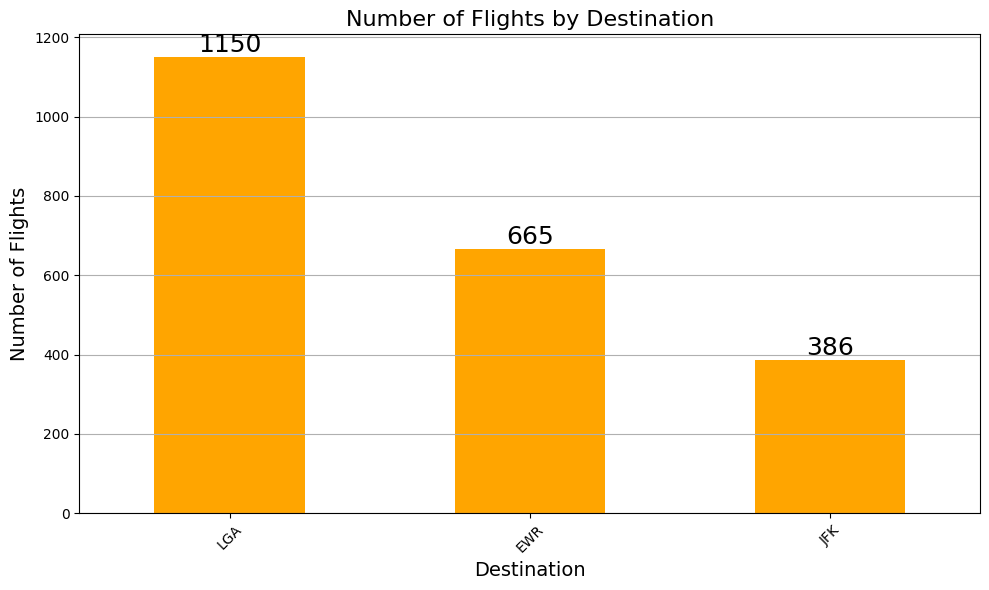

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
destination_counts = flight['DEST'].value_counts()
plt.figure(figsize=(10, 6))
destination_counts.plot(kind='bar', color='orange')
plt.title('Number of Flights by Destination', fontsize=16)
plt.xlabel('Destination', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

# Annotate each bar with its count
for i, count in enumerate(destination_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize = 18)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

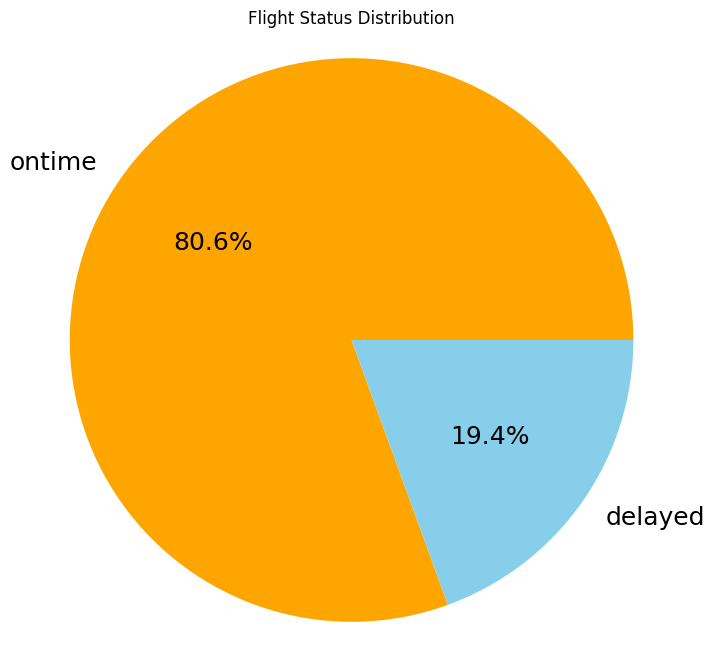

In [ ]:
flight_status_counts = flight['Flight Status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(flight_status_counts, labels=flight_status_counts.index, autopct='%1.1f%%', colors=['orange', 'skyblue'], textprops={'fontsize': 18})
plt.title('Flight Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

<ipython-input-5-7c767eaf7f24>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "CARRIER", data = flight,palette = "Set2")


<Axes: xlabel='CARRIER', ylabel='count'>

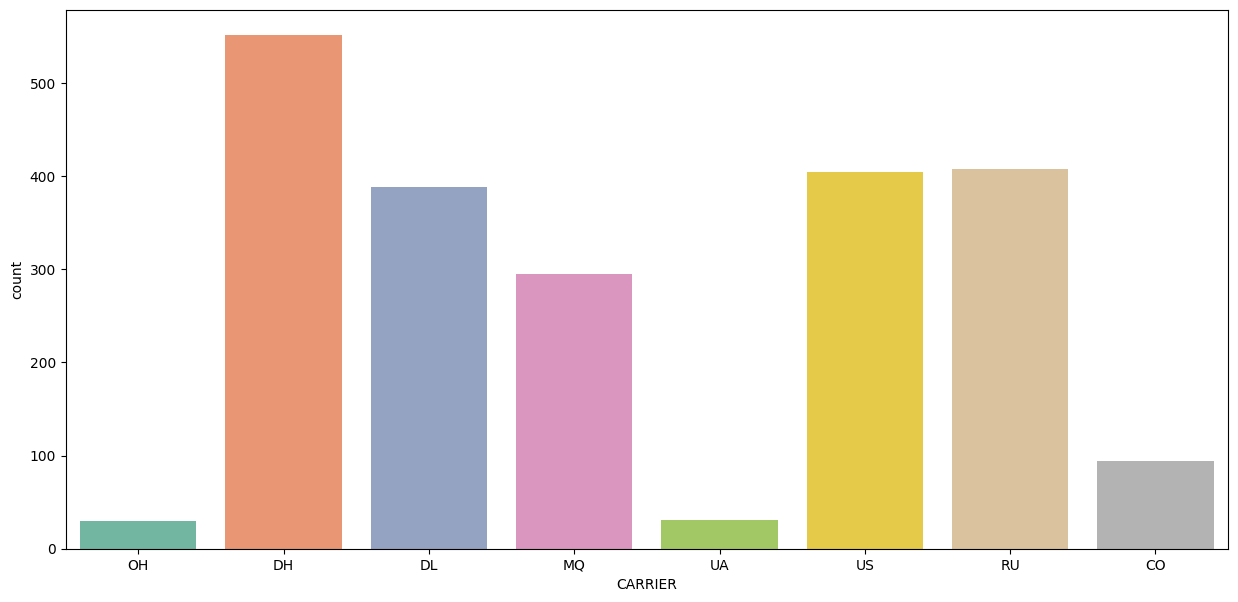

In [ ]:

plt.figure(figsize = (15,7))
sns.countplot(x = "CARRIER", data = flight,palette = "Set2")

<ipython-input-6-84271f00c81a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="DAY_WEEK", data= flight,palette = "Set1")


<Axes: xlabel='DAY_WEEK', ylabel='count'>

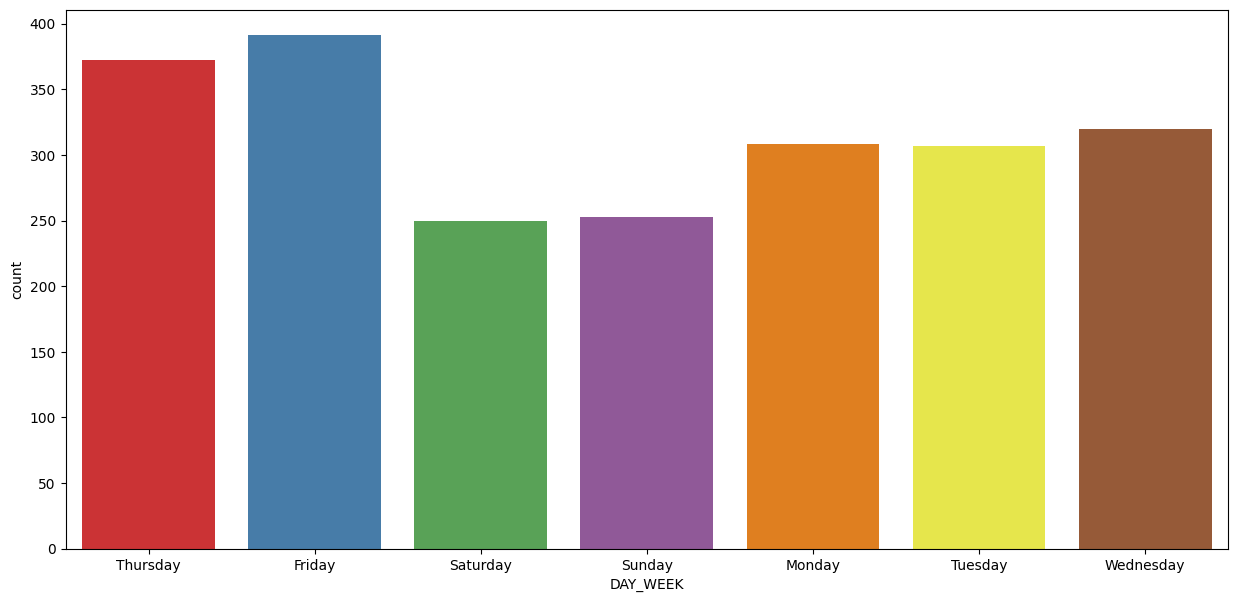

In [ ]:
day_name = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
flight['DAY_WEEK'] = flight['DAY_WEEK'].map(day_name)
plt.figure(figsize = (15,7))

sns.countplot(x="DAY_WEEK", data= flight,palette = "Set1")





DATA CLEANING

In [ ]:
flight.shape

(2201, 13)

In [ ]:
flight.dtypes

CRS_DEP_TIME      int64
CARRIER          object
DEP_TIME          int64
DEST             object
DISTANCE          int64
FL_DATE          object
FL_NUM            int64
ORIGIN           object
Weather           int64
DAY_WEEK         object
DAY_OF_MONTH      int64
TAIL_NUM         object
Flight Status    object
dtype: object

In [ ]:
flight.drop(columns=['TAIL_NUM'], inplace=True)

In [ ]:
# after removing the TAIL_NUM column
flight

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,Thursday,1,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,Thursday,1,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,Thursday,1,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,Thursday,1,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,Thursday,1,ontime
...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,1/31/2004,2761,DCA,0,Saturday,31,ontime
2197,1700,RU,1653,EWR,213,1/31/2004,2497,IAD,0,Saturday,31,ontime
2198,1600,RU,1558,EWR,199,1/31/2004,2361,DCA,0,Saturday,31,ontime
2199,1359,RU,1403,EWR,199,1/31/2004,2216,DCA,0,Saturday,31,ontime


In [ ]:
# Count the values of the target variable
flight['Flight Status'].value_counts()

Flight Status
ontime     1773
delayed     428
Name: count, dtype: int64

In [ ]:
#Find the missing values
flight.isnull().sum()

CRS_DEP_TIME     0
CARRIER          0
DEP_TIME         0
DEST             0
DISTANCE         0
FL_DATE          0
FL_NUM           0
ORIGIN           0
Weather          0
DAY_WEEK         0
DAY_OF_MONTH     0
Flight Status    0
dtype: int64

In [ ]:
flight.describe()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_OF_MONTH
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1371.938664,1369.298955,211.871422,3815.086324,0.014539,16.024989
std,432.697149,442.462754,13.316815,2409.750224,0.119725,8.677390
min,600.000000,10.000000,169.000000,746.000000,0.000000,1.000000
25%,1000.000000,1004.000000,213.000000,2156.000000,0.000000,8.000000
50%,1455.000000,1450.000000,214.000000,2385.000000,0.000000,16.000000
75%,1710.000000,1709.000000,214.000000,6155.000000,0.000000,23.000000
max,2130.000000,2330.000000,229.000000,7924.000000,1.000000,31.000000


In [ ]:
flight['DEP_TIME'] = pd.to_datetime(flight['DEP_TIME'], format='%H%M')
flight['CRS_DEP_TIME'] = pd.to_datetime(flight['CRS_DEP_TIME'], format='%H%M')

flight['DEP_TIME'] = flight['DEP_TIME'].dt.time
flight['CRS_DEP_TIME'] = flight['CRS_DEP_TIME'].dt.time

flight.head(5)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,Flight Status
0,14:55:00,OH,14:55:00,JFK,184,01/01/2004,5935,BWI,0,Thursday,1,ontime
1,16:40:00,DH,16:40:00,JFK,213,01/01/2004,6155,DCA,0,Thursday,1,ontime
2,12:45:00,DH,12:45:00,LGA,229,01/01/2004,7208,IAD,0,Thursday,1,ontime
3,17:15:00,DH,17:09:00,LGA,229,01/01/2004,7215,IAD,0,Thursday,1,ontime
4,10:39:00,DH,10:35:00,LGA,229,01/01/2004,7792,IAD,0,Thursday,1,ontime


In [ ]:
# Another way to read date of the week
day_name = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
flight['DAY_WEEK'] = flight['DAY_WEEK'].map(day_name)

flight.head(5)


,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,Flight Status
0,14:55:00,OH,14:55:00,JFK,184,01/01/2004,5935,BWI,0,NaN,1,ontime
1,16:40:00,DH,16:40:00,JFK,213,01/01/2004,6155,DCA,0,NaN,1,ontime
2,12:45:00,DH,12:45:00,LGA,229,01/01/2004,7208,IAD,0,NaN,1,ontime
3,17:15:00,DH,17:09:00,LGA,229,01/01/2004,7215,IAD,0,NaN,1,ontime
4,10:39:00,DH,10:35:00,LGA,229,01/01/2004,7792,IAD,0,NaN,1,ontime


Decision Tree

convert object to category

In [ ]:
flight["DAY_WEEK"] = flight["DAY_WEEK"].astype("category")
flight["CRS_DEP_TIME"] = flight["DAY_WEEK"].astype("category")

after conversion

In [ ]:
flight.dtypes

CRS_DEP_TIME     category
CARRIER            object
DEP_TIME           object
DEST               object
DISTANCE            int64
FL_DATE            object
FL_NUM              int64
ORIGIN             object
Weather             int64
DAY_WEEK         category
DAY_OF_MONTH        int64
Flight Status      object
dtype: object

In [ ]:
pred = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER', 'Weather']
X = pd.get_dummies(flight[pred], drop_first=True)

Encoding target variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(flight['Flight Status'].values)
y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                      random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(random_state = 1, criterion= "entropy")
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
y_pred = tree.predict(X_test)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred, y_test)))

Accuracy on training set: 0.818
Accuracy on test set: 0.823


confusion matrix

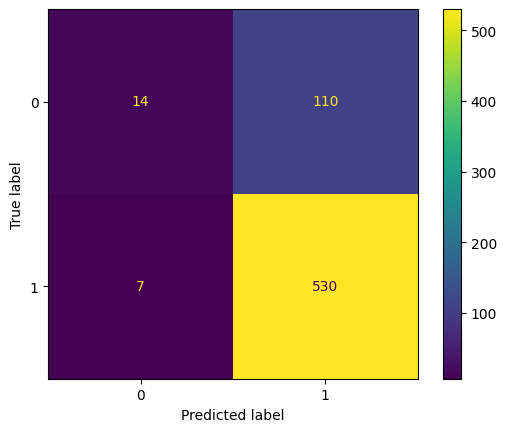

In [ ]:
## confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= tree.classes_)
disp.plot()
plt.show()

variable importance in decision tree

In [ ]:
importance = pd.DataFrame(tree.feature_importances_, index = X.columns, columns = ["Importance"])
importance.sort_values(by = "Importance", ascending = False)

,Importance
Weather,0.384250
CARRIER_US,0.203327
DEST_LGA,0.184940
CARRIER_DL,0.159306
DEST_JFK,0.021660
ORIGIN_DCA,0.021634
CARRIER_RU,0.011066
CARRIER_UA,0.010057
CARRIER_MQ,0.001869
CARRIER_OH,0.001806


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(60,20))
display_tree = plot_tree(tree,
              feature_names=X.columns,
              class_names=["delayed", "on time"],
              filled=True,
              rounded=True,
              fontsize=20)

Logistic Regression

convert object to category

In [ ]:
pred = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER', 'Weather']
X = pd.get_dummies(flight[pred], drop_first=True)

Encode target variable


In [ ]:
from sklearn.preprocessing import LabelEncoder
y = flight['Flight Status']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                      random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
coef = pd.DataFrame(logreg.coef_[0], index = X.columns, columns = ['Coefficients'])
sorted_coef = coef.sort_values(by='Coefficients', ascending=False)
sorted_coef

,Coefficients
CARRIER_US,0.931715
CARRIER_DL,0.560409
CARRIER_OH,0.493028
CARRIER_UA,0.384452
ORIGIN_DCA,0.382759
DEST_LGA,0.364276
DEST_JFK,0.252792
CARRIER_RU,0.240918
CARRIER_DH,0.082171
ORIGIN_IAD,0.052485


In [ ]:
import numpy as np
df = pd.DataFrame(np.exp(logreg.coef_[0]), index= X.columns, columns = ['Odds'])
df
df.sort_values(by=['Odds'], ascending = False)

,Odds
CARRIER_US,2.538860
CARRIER_DL,1.751388
CARRIER_OH,1.637266
CARRIER_UA,1.468810
ORIGIN_DCA,1.466325
DEST_LGA,1.439471
DEST_JFK,1.287616
CARRIER_RU,1.272416
CARRIER_DH,1.085641
ORIGIN_IAD,1.053886


In [ ]:
y_pred = logreg.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn import metrics
print("Accuracy on the training set: {:.3f}".format(logreg.score(X_train, y_train)))
print("Accuracy on the test set: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy on the training set: 0.816
Accuracy on the test set: 0.831


Confusion matrix of Logistic Regression

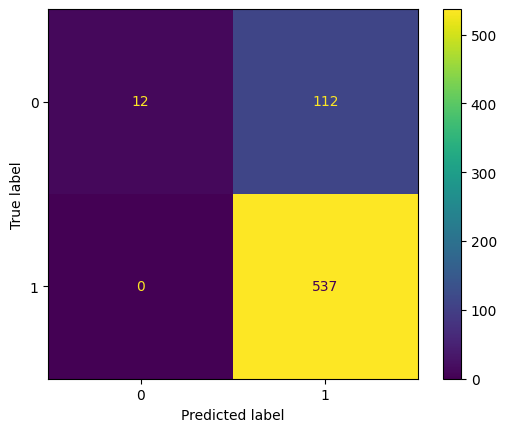

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
dsp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
dsp.plot()

Random Forest Accuracy on training set: 0.818
Random Forest Accuracy on test set: 0.823


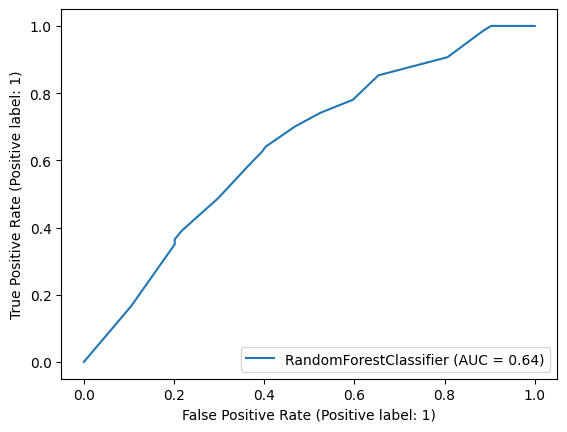

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)


rf_classifier.fit(X_train, y_train)

# Predict on the training set
y_train_pred = rf_classifier.predict(X_train)

# Calculate training set accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
print("Random Forest Accuracy on training set: {:.3f}".format(training_accuracy))


forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

y_rf_pred = forest.predict(X_test)
print("Random Forest Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_rf_pred)))

RocCurveDisplay.from_estimator(forest, X_test, y_test)

       feature  importance
8   CARRIER_OH    0.004907
10  CARRIER_UA    0.007219
9   CARRIER_RU    0.022861
2   ORIGIN_IAD    0.024220
5   CARRIER_DH    0.028005
1   ORIGIN_DCA    0.061220
3     DEST_JFK    0.081791
7   CARRIER_MQ    0.086038
6   CARRIER_DL    0.092846
11  CARRIER_US    0.095457
4     DEST_LGA    0.106336
0      Weather    0.389100


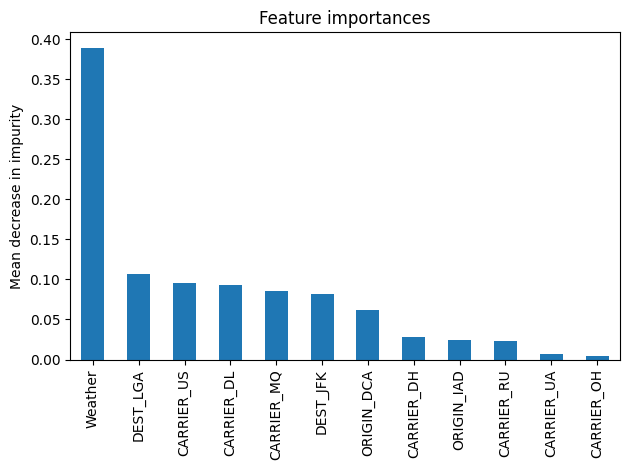

In [ ]:

importances = forest.feature_importances_

df = pd.DataFrame({'feature': X.columns, 'importance': importances})
df = df.sort_values('importance')
print(df)

forest_importances = pd.Series(forest.feature_importances_, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Cross validation and put on a roc curve

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [ ]:

# Assume flight is your DataFrame containing the data
flight["DAY_WEEK"] = flight["DAY_WEEK"].astype("category")
flight["CRS_DEP_TIME"] = flight["CRS_DEP_TIME"].astype("category")  # Corrected dtype
pred = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER', 'Weather']
X = pd.get_dummies(flight[pred], drop_first=True)
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(flight['Flight Status'])

In [ ]:
# Define models
tree = DecisionTreeClassifier(random_state=1, criterion="entropy")
logreg = LogisticRegression()
forest = RandomForestClassifier(n_estimators=100, random_state=0)

In [ ]:
# Define cross-validation strategy (StratifiedKFold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
# Perform cross-validated predictions for Decision Tree
y_probas_tree = cross_val_predict(tree, X, y, cv=cv, method='predict_proba')
fpr_tree, tpr_tree, _ = roc_curve(y, y_probas_tree[:, 1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

In [ ]:

# Perform cross-validated predictions for Logistic Regression
y_probas_logreg = cross_val_predict(logreg, X, y, cv=cv, method='predict_proba')
fpr_logreg, tpr_logreg, _ = roc_curve(y, y_probas_logreg[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

In [ ]:
# Perform cross-validated predictions for Random Forest
y_probas_forest = cross_val_predict(forest, X, y, cv=cv, method='predict_proba')
fpr_forest, tpr_forest, _ = roc_curve(y, y_probas_forest[:, 1])
roc_auc_forest = auc(fpr_forest, tpr_forest)

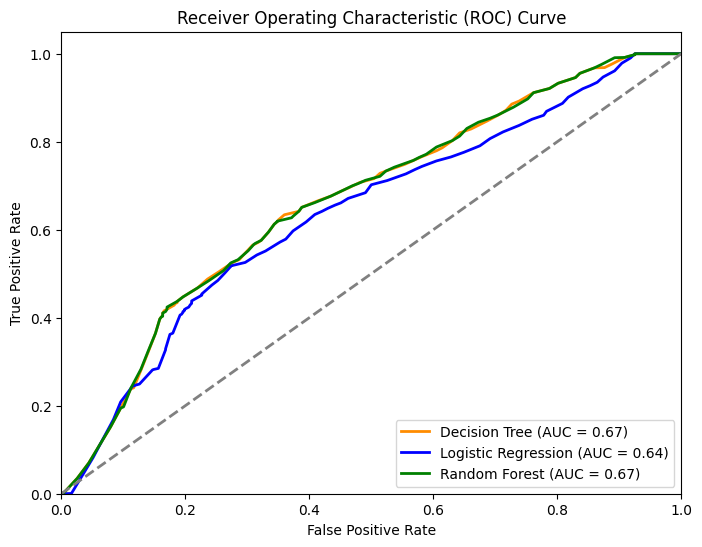

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_tree)
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_forest, tpr_forest, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_forest)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
specified_predictors = ['Carrier', 'Destination', 'Weather', 'Origin', 'Day of the Week', 'Departure Time']
mapped_importances = {
    'Carrier': ['CARRIER_OH', 'CARRIER_UA', 'CARRIER_RU', 'CARRIER_DH', 'CARRIER_MQ', 'CARRIER_DL', 'CARRIER_US'],
    'Destination': ['DEST_JFK', 'DEST_LGA'],
    'Weather': ['Weather'],
    'Origin': ['ORIGIN_IAD', 'ORIGIN_DCA'],
    'Day of the Week': [],
    'Departure Time': []
}
filtered_importances = {}
for predictor, features in mapped_importances.items():
    predictor_importance = 0
    for feature in features:
        predictor_importance += df.loc[df['feature'] == feature, 'importance'].sum()
    filtered_importances[predictor] = predictor_importance
filtered_importances['Day of the Week'] = df.loc[df['feature'].str.startswith('DAY_WEEK'), 'importance'].sum()
filtered_importances['Departure Time'] = df.loc[df['feature'].str.startswith('CRS_DEP_TIME'), 'importance'].sum()
sorted_importances = dict(sorted(filtered_importances.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(10, 6))
plt.bar(sorted_importances.keys(), sorted_importances.values(), color='forestgreen')
plt.xlabel("Predictors")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
